<h1>Importação das Bibliotecas Necessárias</h1>

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder

<h1>Carregamento dos Conjuntos de Dados Iris e Coluna Vertebral</h1>

In [38]:

# Iris Dataset
iris = fetch_ucirepo(id=53)
X_iris = iris.data.features
y_iris = iris.data.targets

# Verificação
print(X_iris.head())
print(y_iris.head())

# metadata 
print(iris.metadata) 

# variable information 
print(iris.variables) 

# Criando um DataFrame para o dataset Iris
iris_data = pd.DataFrame(X_iris, columns=iris.variables)
iris_data['label'] = y_iris

# Salvando o dataset Iris em um arquivo CSV
iris_data.to_csv('iris_data.csv', index=False)

# Coluna Vertebral Dataset
vertebral_column = fetch_ucirepo(id=212)
X_coluna = vertebral_column.data.features
y_coluna = vertebral_column.data.targets

# Verificação
print(X_coluna.head())
print(y_coluna.head())

# metadata 
print(vertebral_column.metadata) 

# variable information 
print(vertebral_column.variables)

# Criando um DataFrame para o dataset Coluna Vertebral
vertebral_data = pd.DataFrame(X_coluna, columns=vertebral_column.variables)
vertebral_data['label'] = y_coluna

# Salvando o dataset Coluna Vertebral em um arquivo CSV
vertebral_data.to_csv('vertebral_column_data.csv', index=False)

   sepal length  sepal width  petal length  petal width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
         class
0  Iris-setosa
1  Iris-setosa
2  Iris-setosa
3  Iris-setosa
4  Iris-setosa
{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None,

<h1>Geração do Conjunto de Dados Artificial</h1>

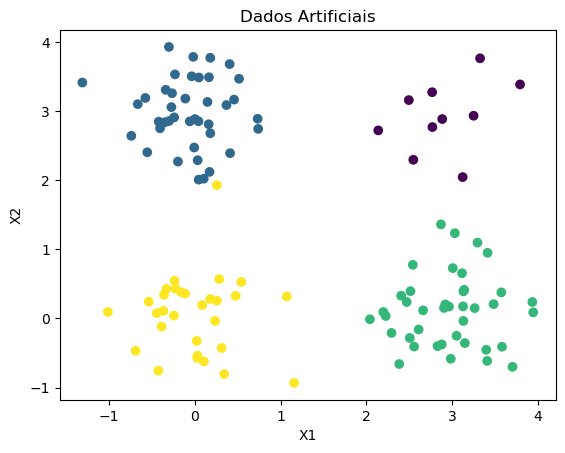

In [39]:

# Definindo os parâmetros para as quatro classes artificiais
np.random.seed(42)

# Classe 1: Primeiro quadrante, 10 padrões
class_1 = np.random.normal(loc=(3, 3), scale=0.5, size=(10, 2))

# Classe 2: Eixo y alinhado com a Classe 1, 40 padrões
class_2 = np.random.normal(loc=(0, 3), scale=0.5, size=(40, 2))

# Classe 3: Eixo x alinhado com a Classe 1, 40 padrões
class_3 = np.random.normal(loc=(3, 0), scale=0.5, size=(40, 2))

# Classe 4: Em torno da origem, alinhado com x e y das Classes 2 e 3, 30 padrões
class_4 = np.random.normal(loc=(0, 0), scale=0.5, size=(30, 2))

# Combinando as classes
X_artificial = np.vstack((class_1, class_2, class_3, class_4))
y_artificial = np.array([1]*10 + [2]*40 + [3]*40 + [4]*30)

# Criando um DataFrame para os dados artificiais
artificial_data = pd.DataFrame(X_artificial, columns=['X1', 'X2'])
artificial_data['label'] = y_artificial

# Salvando os dados artificiais em um arquivo CSV
artificial_data.to_csv('dados_artificiais.csv', index=False)

# Plot dos dados artificiais
plt.scatter(X_artificial[:, 0], X_artificial[:, 1], c=y_artificial, cmap='viridis')
plt.title("Dados Artificiais")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

<h1>Implementação do Algoritmo K-Médias e Quantização Vetorial</h1>

In [40]:

def k_means_classification(X, y, n_clusters=3, n_init=10, max_iter=300):
    kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, max_iter=max_iter)
    kmeans.fit(X)
    y_pred = kmeans.predict(X)
    
    # Ajustar os rótulos para a correspondência correta
    new_labels = np.zeros_like(y_pred)
    for i in range(n_clusters):
        mask = (y_pred == i)
        new_labels[mask] = np.argmax(np.bincount(y[mask]))
    
    return new_labels, kmeans

def evaluate_model(X, y, n_clusters=3):
    y_pred, _ = k_means_classification(X, y, n_clusters=n_clusters)
    
    # Matriz de Confusão e Acurácia
    conf_matrix = confusion_matrix(y, y_pred)
    accuracy = accuracy_score(y, y_pred)
    
    return conf_matrix, accuracy


<h1>Avaliação dos Conjuntos de Dados</h1>

<h3>Para cada dataset (Iris, Coluna, Artificial), faremos 20 realizações para calcular a acurácia média e o desvio padrão.</h3>

In [41]:

# Converter rótulos de classe para inteiros
label_encoder_iris = LabelEncoder()
y_iris_int = label_encoder_iris.fit_transform(y_iris)

label_encoder_coluna = LabelEncoder()
y_coluna_int = label_encoder_coluna.fit_transform(y_coluna)

label_encoder_artificial = LabelEncoder()
y_artificial_int = label_encoder_artificial.fit_transform(y_artificial)

def run_experiments(X, y, n_clusters=3, n_runs=20):
    accuracies = []
    for _ in range(n_runs):
        _, accuracy = evaluate_model(X, y, n_clusters=n_clusters)
        accuracies.append(accuracy)
    
    mean_accuracy = np.mean(accuracies)
    std_accuracy = np.std(accuracies)
    
    return mean_accuracy, std_accuracy

# Avaliação dos Conjuntos de Dados
mean_acc_iris, std_acc_iris = run_experiments(X_iris, y_iris_int, n_clusters=3)
mean_acc_coluna, std_acc_coluna = run_experiments(X_coluna, y_coluna_int, n_clusters=3)
mean_acc_artificial, std_acc_artificial = run_experiments(X_artificial, y_artificial_int, n_clusters=4)

print(f'Iris Dataset - Acurácia Média: {mean_acc_iris:.2f}, Desvio Padrão: {std_acc_iris:.2f}')
print(f'Coluna Vertebral Dataset - Acurácia Média: {mean_acc_coluna:.2f}, Desvio Padrão: {std_acc_coluna:.2f}')
print(f'Artificial Dataset - Acurácia Média: {mean_acc_artificial:.2f}, Desvio Padrão: {std_acc_artificial:.2f}')


C:\Users\jorge\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jorge\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jorge\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jorge\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks

Iris Dataset - Acurácia Média: 0.89, Desvio Padrão: 0.00
Coluna Vertebral Dataset - Acurácia Média: 0.68, Desvio Padrão: 0.00
Artificial Dataset - Acurácia Média: 0.99, Desvio Padrão: 0.00


Desvio Padrão Zero:
O desvio padrão sendo 0 significa que a acurácia foi a mesma em todas as 20 realizações. Isso pode acontecer se o algoritmo de K-Médias estiver sempre convergindo para a mesma solução ou se os dados forem fáceis de classificar com os clusters iniciais gerados.
Para aumentar a variabilidade nas realizações e possivelmente de verificar o desvio padrão aumentarei o número de inicializações do K-Means (n_init) para garantir que ele explore mais variações.
Usar diferentes inicializações de centroides (definindo init='random')

In [42]:

# Converter rótulos de classe para inteiros
label_encoder_iris = LabelEncoder()
y_iris_int = label_encoder_iris.fit_transform(y_iris)

label_encoder_coluna = LabelEncoder()
y_coluna_int = label_encoder_coluna.fit_transform(y_coluna)

label_encoder_artificial = LabelEncoder()
y_artificial_int = label_encoder_artificial.fit_transform(y_artificial)

def run_experiments(X, y, n_clusters=3, n_runs=20):
    accuracies = []
    for _ in range(n_runs):
        _, accuracy = evaluate_model(X, y, n_clusters=n_clusters)
        accuracies.append(accuracy)
    
    mean_accuracy = np.mean(accuracies)
    std_accuracy = np.std(accuracies)
    
    return mean_accuracy, std_accuracy

# Avaliação dos Conjuntos de Dados
mean_acc_iris, std_acc_iris = run_experiments(X_iris, y_iris_int, n_clusters=3)
mean_acc_coluna, std_acc_coluna = run_experiments(X_coluna, y_coluna_int, n_clusters=3)
mean_acc_artificial, std_acc_artificial = run_experiments(X_artificial, y_artificial_int, n_clusters=4)

print(f'Iris Dataset - Acurácia Média: {mean_acc_iris:.5f}, Desvio Padrão: {std_acc_iris:.5f}')
print(f'Coluna Vertebral Dataset - Acurácia Média: {mean_acc_coluna:.5f}, Desvio Padrão: {std_acc_coluna:.5f}')
print(f'Artificial Dataset - Acurácia Média: {mean_acc_artificial:.5f}, Desvio Padrão: {std_acc_artificial:.5f}')


C:\Users\jorge\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jorge\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jorge\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jorge\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks

Iris Dataset - Acurácia Média: 0.89333, Desvio Padrão: 0.00000
Coluna Vertebral Dataset - Acurácia Média: 0.67742, Desvio Padrão: 0.00000
Artificial Dataset - Acurácia Média: 0.99167, Desvio Padrão: 0.00000


In [43]:
# Converter rótulos de classe para inteiros
label_encoder_iris = LabelEncoder()
y_iris_int = label_encoder_iris.fit_transform(y_iris)

label_encoder_coluna = LabelEncoder()
y_coluna_int = label_encoder_coluna.fit_transform(y_coluna)

label_encoder_artificial = LabelEncoder()
y_artificial_int = label_encoder_artificial.fit_transform(y_artificial)

def evaluate_model(X, y, n_clusters):
    # Aplicando KMeans
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, init='random', random_state=None)
    kmeans.fit(X)
    predicted_labels = kmeans.labels_

    # Relabeling (necessário se os rótulos preditos não corresponderem aos rótulos reais)
    predicted_labels = LabelEncoder().fit_transform(predicted_labels)
    
    # Calcular acurácia
    accuracy = accuracy_score(y, predicted_labels)
    
    return predicted_labels, accuracy

def run_experiments(X, y, n_clusters=3, n_runs=20):
    accuracies = []
    for _ in range(n_runs):
        _, accuracy = evaluate_model(X, y, n_clusters=n_clusters)
        accuracies.append(accuracy)
    
    mean_accuracy = np.mean(accuracies)
    std_accuracy = np.std(accuracies)
    
    return mean_accuracy, std_accuracy

# Avaliação dos Conjuntos de Dados
mean_acc_iris, std_acc_iris = run_experiments(X_iris, y_iris_int, n_clusters=3)
mean_acc_coluna, std_acc_coluna = run_experiments(X_coluna, y_coluna_int, n_clusters=3)
mean_acc_artificial, std_acc_artificial = run_experiments(X_artificial, y_artificial_int, n_clusters=4)

print(f'Iris Dataset - Acurácia Média: {mean_acc_iris:.5f}, Desvio Padrão: {std_acc_iris:.5f}')
print(f'Coluna Vertebral Dataset - Acurácia Média: {mean_acc_coluna:.5f}, Desvio Padrão: {std_acc_coluna:.5f}')
print(f'Artificial Dataset - Acurácia Média: {mean_acc_artificial:.5f}, Desvio Padrão: {std_acc_artificial:.5f}')


C:\Users\jorge\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jorge\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jorge\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jorge\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks

Iris Dataset - Acurácia Média: 0.43200, Desvio Padrão: 0.31731
Coluna Vertebral Dataset - Acurácia Média: 0.34210, Desvio Padrão: 0.19216
Artificial Dataset - Acurácia Média: 0.17125, Desvio Padrão: 0.20982


<h1>Matrizes de Confusão</h1>

In [49]:
def k_means_classification(X, y, n_clusters=3, n_init=10, max_iter=300, random_state=None):
    kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, max_iter=max_iter, random_state=random_state)
    kmeans.fit(X)
    y_pred = kmeans.predict(X)
    
    # Converter y para uma array NumPy
    y = np.array(y)
    
    # Converter rótulos de string para inteiros
    le = LabelEncoder()
    y_encoded = le.fit_transform(y.ravel())  # Usar ravel() para garantir uma array 1D
    
    # Ajustar os rótulos para a correspondência correta
    new_labels = np.zeros_like(y_pred)
    for i in range(n_clusters):
        mask = (y_pred == i)
        new_labels[mask] = np.argmax(np.bincount(y_encoded[mask]))
    
    return new_labels, kmeans

def evaluate_model(X, y, n_clusters=3, random_state=None):
    y_pred, _ = k_means_classification(X, y, n_clusters=n_clusters, random_state=random_state)
    
    # Converter y para uma array NumPy
    y = np.array(y)
    
    # Converter rótulos de string para inteiros para comparação
    le = LabelEncoder()
    y_encoded = le.fit_transform(y.ravel())  # Usar ravel() para garantir uma array 1D
    
    # Matriz de Confusão e Acurácia
    conf_matrix = confusion_matrix(y_encoded, y_pred)
    accuracy = accuracy_score(y_encoded, y_pred)
    
    return conf_matrix, accuracy

# Exemplo para Iris
conf_matrix_iris, _ = evaluate_model(X_iris, y_iris, n_clusters=3)
print("Matriz de Confusão para Iris Dataset")
print(conf_matrix_iris)

# Exemplo para Coluna Vertebral
conf_matrix_coluna, _ = evaluate_model(X_coluna, y_coluna, n_clusters=3)
print("Matriz de Confusão para Coluna Vertebral Dataset")
print(conf_matrix_coluna)

# Exemplo para Artificial
conf_matrix_artificial, _ = evaluate_model(X_artificial, y_artificial, n_clusters=4)
print("Matriz de Confusão para Artificial Dataset")
print(conf_matrix_artificial)


C:\Users\jorge\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Matriz de Confusão para Iris Dataset
[[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]
Matriz de Confusão para Coluna Vertebral Dataset
[[  0  60   0]
 [  0  98   2]
 [  0  38 112]]


C:\Users\jorge\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Matriz de Confusão para Artificial Dataset
[[10  0  0  0]
 [ 0 40  0  0]
 [ 0  0 40  0]
 [ 0  1  0 29]]


C:\Users\jorge\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


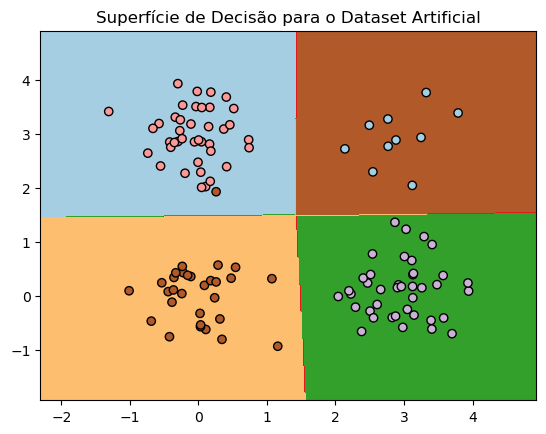

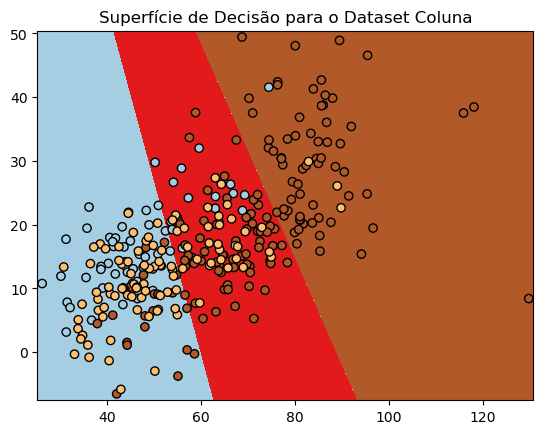

C:\Users\jorge\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


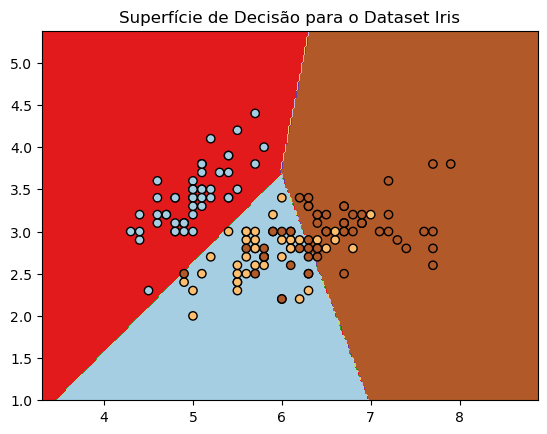

In [51]:
def plot_decision_boundary(X, y, kmeans, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    
    # Converter y para uma array NumPy e, se necessário, mapear para números
    if isinstance(y, pd.DataFrame):
        y = y.values.ravel()  # Converter para uma array 1D
    
    if isinstance(y[0], str):
        le = LabelEncoder()
        y = le.fit_transform(y)
    
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.Paired)
    plt.title(title)
    plt.show()

# Plotando para o Dataset Artificial
_, kmeans_artificial = k_means_classification(X_artificial, y_artificial, n_clusters=4)
plot_decision_boundary(X_artificial, y_artificial, kmeans_artificial, "Superfície de Decisão para o Dataset Artificial")

# Plotando para o Dataset Coluna
X_coluna_subset = X_coluna[['pelvic_incidence', 'pelvic_tilt']].values
_, kmeans_coluna = k_means_classification(X_coluna_subset, y_coluna, n_clusters=3)
plot_decision_boundary(X_coluna_subset, y_coluna, kmeans_coluna, "Superfície de Decisão para o Dataset Coluna")

# Plotando para o Dataset Iris
X_iris_subset = X_iris[['sepal length', 'sepal width']].values
_, kmeans_iris = k_means_classification(X_iris_subset, y_iris, n_clusters=3)
plot_decision_boundary(X_iris_subset, y_iris, kmeans_iris, "Superfície de Decisão para o Dataset Iris")
